In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv('./assets/20200124_ews_observations.csv',sep=',',low_memory=False)

In [36]:
df.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0


In [37]:
df.ObservationDate = pd.to_datetime(df.ObservationDate)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        171736 non-null  int64         
 1   ObservationDate  171736 non-null  datetime64[ns]
 2   EwsProcedure     171736 non-null  object        
 3   EWS_Total        171736 non-null  int64         
 4   SBP              160949 non-null  float64       
 5   SBP_Score        160949 non-null  float64       
 6   LOC              171736 non-null  object        
 7   LOC_Score        171736 non-null  int64         
 8   SpO2             171734 non-null  float64       
 9   SpO2_Score       171734 non-null  float64       
 10  Add_O2           171734 non-null  object        
 11  Add_O2_Score     171734 non-null  float64       
 12  HR               171736 non-null  int64         
 13  HR_Score         171736 non-null  int64         
 14  RR               171

In [39]:
df['LOC'].unique()

array(['ALERT', 'UNRESPONSIVE', 'NEW_CONFUSION', 'VOICE', 'PAIN'],
      dtype=object)

In [40]:
df.isnull().sum()

PatientId              0
ObservationDate        0
EwsProcedure           0
EWS_Total              0
SBP                10787
SBP_Score          10787
LOC                    0
LOC_Score              0
SpO2                   2
SpO2_Score             2
Add_O2                 2
Add_O2_Score           2
HR                     0
HR_Score               0
RR                     0
RR_Score               0
TEMP                   0
TEMP_Score             0
dtype: int64

In [41]:
df.dropna(axis=0,inplace=True)

In [42]:
df.isnull().sum()

PatientId          0
ObservationDate    0
EwsProcedure       0
EWS_Total          0
SBP                0
SBP_Score          0
LOC                0
LOC_Score          0
SpO2               0
SpO2_Score         0
Add_O2             0
Add_O2_Score       0
HR                 0
HR_Score           0
RR                 0
RR_Score           0
TEMP               0
TEMP_Score         0
dtype: int64

In [43]:
df.columns

Index(['PatientId', 'ObservationDate', 'EwsProcedure', 'EWS_Total', 'SBP',
       'SBP_Score', 'LOC', 'LOC_Score', 'SpO2', 'SpO2_Score', 'Add_O2',
       'Add_O2_Score', 'HR', 'HR_Score', 'RR', 'RR_Score', 'TEMP',
       'TEMP_Score'],
      dtype='object')

In [81]:
patient30 = df[df.PatientId == 30]
patient30.shape
patient30.reset_index(drop=True, inplace=True)

In [45]:
import seaborn as sns

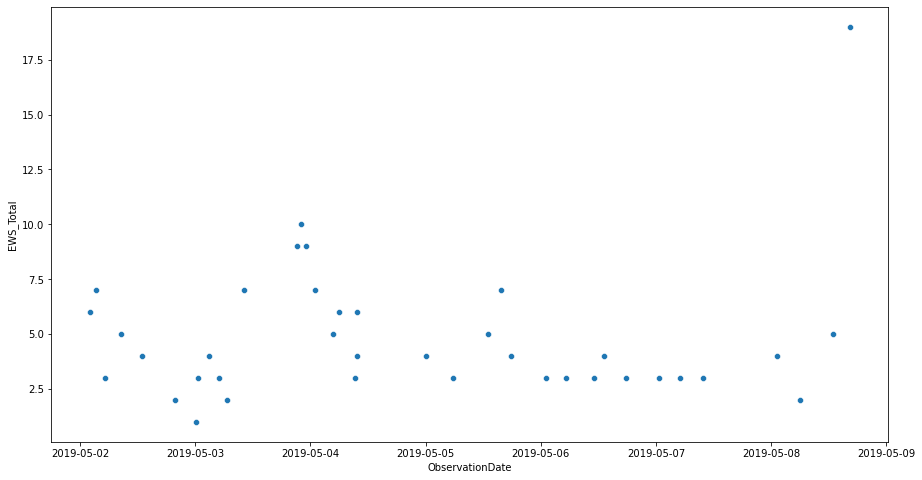

In [47]:
plt.figure(figsize=(15,8))
g = sns.scatterplot(x='ObservationDate', y='EWS_Total', data=patient30)
plt.show()

In [56]:
x = patient30[['SBP','SpO2','HR','RR','TEMP']]

In [57]:
y = patient30.EWS_Total

In [58]:
x.head()

,SBP,SpO2,HR,RR,TEMP
17,89.0,96.0,84,25,36.4
18,87.0,95.0,80,26,36.4
26,92.0,95.0,67,19,36.3
31,73.0,96.0,86,20,36.3
45,97.0,99.0,90,20,36.1


In [59]:
encode_LOC = pd.DataFrame(patient30.LOC,
                  columns=['LOC'])
encode_LOC_dummies = pd.get_dummies(encode_LOC)
x = x.join(encode_LOC_dummies)

In [60]:
x.head()

,SBP,SpO2,HR,RR,TEMP,LOC_ALERT,LOC_NEW_CONFUSION
17,89.0,96.0,84,25,36.4,1,0
18,87.0,95.0,80,26,36.4,1,0
26,92.0,95.0,67,19,36.3,1,0
31,73.0,96.0,86,20,36.3,1,0
45,97.0,99.0,90,20,36.1,1,0


In [61]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [66]:
regressor.score(x_train, y_train)

0.9158535891935453

In [67]:
regressor.score(x_test, y_test)

0.582928624017046

In [83]:
var = regressor.predict(x)
var2 = pd.DataFrame(data=var[0:,0:],index=[i for i in range(var.shape[0])],columns=['predictedEWS'])

In [85]:
patient30 = patient30.join(var2['predictedEWS'])

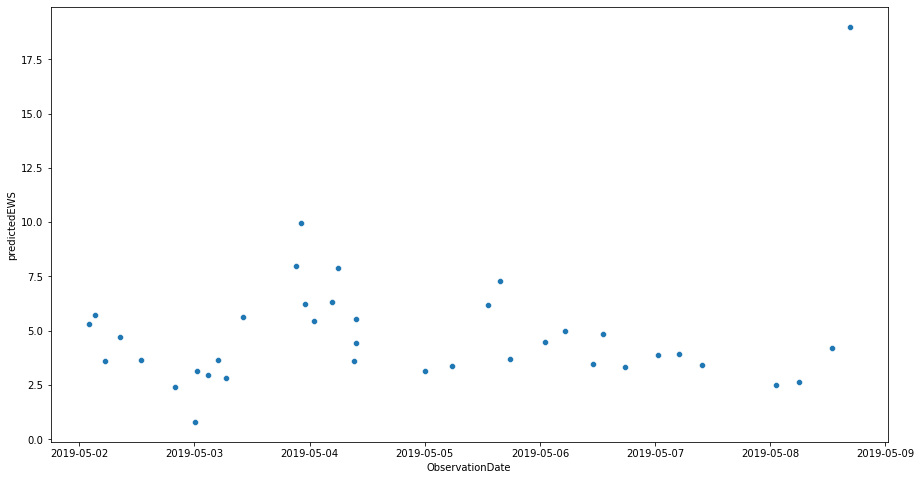

In [86]:
plt.figure(figsize=(15,8))
g = sns.scatterplot(x='ObservationDate', y='predictedEWS', data=patient30)
plt.show()

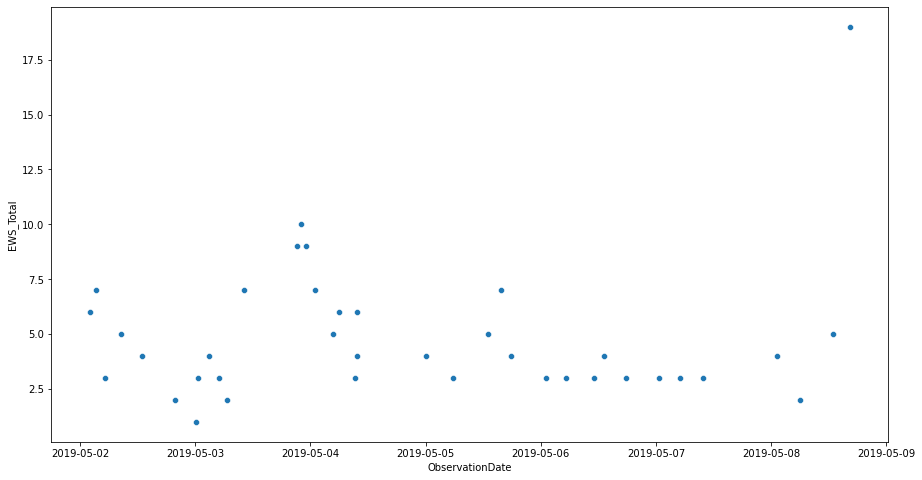

In [87]:
plt.figure(figsize=(15,8))
g = sns.scatterplot(x='ObservationDate', y='EWS_Total', data=patient30)
plt.show()